# ***Does community toxicity(measured by the tone and negativity of player reviews) influence engagement and profitability across different video game genres?***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# toxicity dataset
reviews_df = pd.read_csv('train.csv')

# engagement/profitability dataset
games_df   = pd.read_csv('steam.csv')

# genre dataset
# tags_df    = pd.read_csv('steamspy_tag_data.csv')    # we later realized we will not require this dataset as the games dataset already has a genre column

In [ ]:
print("Reviews Data Info:")
print(reviews_df.info(), "\n")

print("Games Data Info:")
print(games_df.info(), "\n")

# print("Tags Data Info:")
# print(tags_df.info())

Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB
None 

Games Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27

In [ ]:
display(reviews_df.head())
display(games_df.head())
# display(tags_df.head())

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
# Calculating the toxicity per game:

# Rename the game title column
reviews_df = reviews_df.rename(columns={'title': 'game_title'})

# 1 = positive, 0 = negative
# So toxicity = 1 - user_suggestion
reviews_df['toxicity_flag'] = 1 - reviews_df['user_suggestion']

toxicity_df = (
    reviews_df.groupby('game_title', as_index=False)['toxicity_flag']
              .mean()
              .rename(columns={'toxicity_flag': 'avg_toxicity'})
)

display(toxicity_df.head())


,game_title,avg_toxicity
0,AdventureQuest 3D,0.427746
1,Black Squad,0.138889
2,Bless Online,0.787921
3,Bloons TD Battles,0.587983
4,Brawlhalla,0.134146


In [ ]:
games_df = games_df.rename(columns={'name': 'game_title'})

# Merge toxicity scores with game profitability/engagement data
merged_df = pd.merge(
    games_df,
    toxicity_df,
    on='game_title',
    how='inner'
)

print("Merged shape:", merged_df.shape)
display(merged_df.head())


Merged shape: (42, 19)


,appid,game_title,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,avg_toxicity
0,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.0,0.237996
1,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.0,0.498765
2,109600,Neverwinter,2013-12-05,1,Cryptic Studios,Perfect World Entertainment,windows,0,Multi-player;MMO;Co-op;Steam Trading Cards;In-...,Adventure;Free to Play;Massively Multiplayer;RPG,Free to Play;MMORPG;RPG,0,18517,5297,1273,543,5000000-10000000,0.0,0.430403
3,200210,Realm of the Mad God,2012-02-20,1,Wild Shadow Studios;Deca Games,Deca Games,windows;mac,0,Multi-player;MMO;Co-op;Cross-Platform Multipla...,Action;Free to Play;Indie;Massively Multiplaye...,Free to Play;Massively Multiplayer;Pixel Graphics,31,23414,4728,3531,64,2000000-5000000,0.0,0.197059
4,201230,EverQuest II,2011-12-07,1,Daybreak Game Company,Daybreak Game Company,windows,0,Multi-player;MMO,Free to Play;Massively Multiplayer;RPG,Free to Play;RPG;Massively Multiplayer,0,846,319,548,604,500000-1000000,0.0,0.028986


In [ ]:
print("Final merged shape:", merged_df.shape)
display(merged_df.head())

Final merged shape: (42, 19)


,appid,game_title,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,avg_toxicity
0,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.0,0.237996
1,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.0,0.498765
2,109600,Neverwinter,2013-12-05,1,Cryptic Studios,Perfect World Entertainment,windows,0,Multi-player;MMO;Co-op;Steam Trading Cards;In-...,Adventure;Free to Play;Massively Multiplayer;RPG,Free to Play;MMORPG;RPG,0,18517,5297,1273,543,5000000-10000000,0.0,0.430403
3,200210,Realm of the Mad God,2012-02-20,1,Wild Shadow Studios;Deca Games,Deca Games,windows;mac,0,Multi-player;MMO;Co-op;Cross-Platform Multipla...,Action;Free to Play;Indie;Massively Multiplaye...,Free to Play;Massively Multiplayer;Pixel Graphics,31,23414,4728,3531,64,2000000-5000000,0.0,0.197059
4,201230,EverQuest II,2011-12-07,1,Daybreak Game Company,Daybreak Game Company,windows,0,Multi-player;MMO,Free to Play;Massively Multiplayer;RPG,Free to Play;RPG;Massively Multiplayer,0,846,319,548,604,500000-1000000,0.0,0.028986


#***Data Cleaning & Preprocessing***

In [ ]:
merged_df.isnull().sum()

,0
appid,0
game_title,0
release_date,0
english,0
developer,0
publisher,0
platforms,0
required_age,0
categories,0
genres,0


In [ ]:
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')

In [ ]:
merged_df = merged_df.dropna(subset=['owners', 'price'])

In [ ]:
merged_df['avg_toxicity'] = pd.to_numeric(merged_df['avg_toxicity'], errors='coerce')

In [ ]:
merged_df = merged_df.drop_duplicates(subset='game_title')

In [ ]:
merged_df.info()
merged_df.describe()
display(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             42 non-null     int64  
 1   game_title        42 non-null     object 
 2   release_date      42 non-null     object 
 3   english           42 non-null     int64  
 4   developer         42 non-null     object 
 5   publisher         42 non-null     object 
 6   platforms         42 non-null     object 
 7   required_age      42 non-null     int64  
 8   categories        42 non-null     object 
 9   genres            42 non-null     object 
 10  steamspy_tags     42 non-null     object 
 11  achievements      42 non-null     int64  
 12  positive_ratings  42 non-null     int64  
 13  negative_ratings  42 non-null     int64  
 14  average_playtime  42 non-null     int64  
 15  median_playtime   42 non-null     int64  
 16  owners            42 non-null     int64  
 17 

,appid,game_title,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,avg_toxicity
0,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000,0.0,0.237996
1,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000,0.0,0.498765
2,109600,Neverwinter,2013-12-05,1,Cryptic Studios,Perfect World Entertainment,windows,0,Multi-player;MMO;Co-op;Steam Trading Cards;In-...,Adventure;Free to Play;Massively Multiplayer;RPG,Free to Play;MMORPG;RPG,0,18517,5297,1273,543,5000000,0.0,0.430403
3,200210,Realm of the Mad God,2012-02-20,1,Wild Shadow Studios;Deca Games,Deca Games,windows;mac,0,Multi-player;MMO;Co-op;Cross-Platform Multipla...,Action;Free to Play;Indie;Massively Multiplaye...,Free to Play;Massively Multiplayer;Pixel Graphics,31,23414,4728,3531,64,2000000,0.0,0.197059
4,201230,EverQuest II,2011-12-07,1,Daybreak Game Company,Daybreak Game Company,windows,0,Multi-player;MMO,Free to Play;Massively Multiplayer;RPG,Free to Play;RPG;Massively Multiplayer,0,846,319,548,604,500000,0.0,0.028986


#***Descriptive Analysis***

In [ ]:
merged_df[['avg_toxicity', 'owners', 'price', 'average_playtime']].describe()

,avg_toxicity,owners,price,average_playtime
count,42.000000,4.200000e+01,42.0,42.000000
mean,0.382879,5.650000e+06,0.0,2153.857143
std,0.236917,1.544831e+07,0.0,3955.685957
min,0.028986,2.000000e+05,0.0,75.000000
25%,0.149212,1.000000e+06,0.0,364.000000
50%,0.382473,2.000000e+06,0.0,957.500000
75%,0.524318,5.000000e+06,0.0,1924.250000
max,0.942993,1.000000e+08,0.0,23944.000000


In [ ]:
merged_df['genres'].value_counts().head(20)

,count
genres,
Action;Free to Play;Early Access,3
Action;Free to Play,2
Action;Free to Play;Strategy,2
Action;Free to Play;Indie;Massively Multiplayer;RPG,2
Adventure;Free to Play;Massively Multiplayer;RPG,2
Action;Adventure;Casual;Free to Play;Massively Multiplayer;RPG,2
Action;Free to Play;Massively Multiplayer,2
Action;Free to Play;Massively Multiplayer;Early Access,2
Free to Play;Massively Multiplayer;RPG,1


In [ ]:
merged_df.groupby('genres')['avg_toxicity'].mean().sort_values(ascending=False).head(10)

,avg_toxicity
genres,
Action;Free to Play;Indie;Massively Multiplayer;RPG;Simulation,0.942993
Action;Free to Play;Indie;Massively Multiplayer,0.889933
Action;Free to Play;Massively Multiplayer;Simulation,0.830556
Action;Adventure;Free to Play;Massively Multiplayer;RPG,0.787921
Action;Adventure;Free to Play;Simulation;Sports,0.555985
Action;Free to Play;Strategy,0.543374
Free to Play;Racing;Simulation;Sports,0.533654
Free to Play;Strategy,0.526316
Casual;Free to Play;Indie;Massively Multiplayer;Strategy,0.518325


In [ ]:
merged_df.groupby('genres')['owners'].mean().sort_values(ascending=False).head(10)

,owners
genres,
Action;Free to Play;Strategy,50500000.0
Action;Free to Play,12500000.0
Action;Free to Play;Indie;Massively Multiplayer;RPG;Simulation,10000000.0
Action;Free to Play;Indie;Massively Multiplayer,10000000.0
Action;Adventure;Free to Play;Indie;Massively Multiplayer;RPG,10000000.0
Action;Free to Play;Indie,10000000.0
Action;Free to Play;Massively Multiplayer;Simulation,10000000.0
Action;Adventure;Free to Play;Simulation;Sports,5000000.0
Action;Free to Play;Indie;Massively Multiplayer;RPG,3500000.0


In [ ]:
merged_df.sort_values('avg_toxicity', ascending=False)[['game_title','avg_toxicity','owners','genres']].head(10)

,game_title,avg_toxicity,owners,genres
16,Robocraft,0.942993,10000000,Action;Free to Play;Indie;Massively Multiplaye...
8,Heroes & Generals,0.889933,10000000,Action;Free to Play;Indie;Massively Multiplayer
9,War Thunder,0.830556,10000000,Action;Free to Play;Massively Multiplayer;Simu...
36,Bless Online,0.787921,200000,Action;Adventure;Free to Play;Massively Multip...
32,Infestation: The New Z,0.730689,5000000,Action;Free to Play;Indie;Massively Multiplaye...
41,Cuisine Royale,0.624060,1000000,Action;Free to Play;Massively Multiplayer;Earl...
28,Bloons TD Battles,0.587983,1000000,Action;Free to Play;Strategy
12,theHunter Classic,0.555985,5000000,Action;Adventure;Free to Play;Simulation;Sports
17,Trove,0.546512,5000000,Action;Adventure;Casual;Free to Play;Massively...
5,RaceRoom Racing Experience,0.533654,2000000,Free to Play;Racing;Simulation;Sports


In [ ]:
merged_df.sort_values('avg_toxicity')[['game_title','avg_toxicity','owners','genres']].head(10)

,game_title,avg_toxicity,owners,genres
4,EverQuest II,0.028986,500000,Free to Play;Massively Multiplayer;RPG
11,Path of Exile,0.093886,10000000,Action;Adventure;Free to Play;Indie;Massively ...
14,Creativerse,0.099593,2000000,Action;Adventure;Casual;Free to Play;Indie;Mas...
6,PlanetSide 2,0.103814,5000000,Action;Free to Play;Massively Multiplayer
37,Tactical Monsters Rumble Arena,0.105263,200000,Adventure;Free to Play;Indie;RPG;Strategy
20,Spooky's Jump Scare Mansion,0.113260,1000000,Action;Adventure;Free to Play;Indie
38,Ring of Elysium,0.124105,2000000,Action;Free to Play;Massively Multiplayer;Earl...
15,Brawlhalla,0.134146,10000000,Action;Free to Play;Indie
29,Shop Heroes,0.134615,500000,Casual;Free to Play;Massively Multiplayer;RPG;...
35,Realm Grinder,0.135484,500000,Free to Play;RPG;Strategy


*The descriptive statistics reveal substantial variation in game toxicity, popularity, and engagement. Average toxicity is around 38%, but some games are near zero while others approach 94% negative reviews. Owners range from 200,000 to 100 million, indicating a mix of small and major titles. Engagement also spans widely, from 75 minutes to over 23,000 minutes. This variation is important because it lets us explore whether community toxicity is associated with higher or lower engagement and player base size.*

#***Data Visualization***

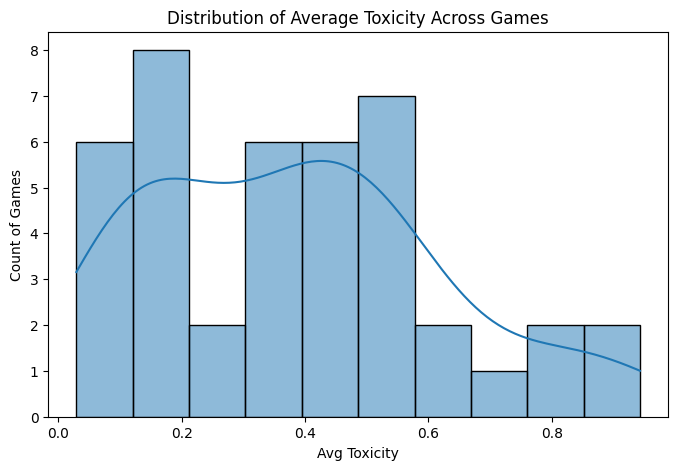

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df['avg_toxicity'], bins=10, kde=True)
plt.title("Distribution of Average Toxicity Across Games")
plt.xlabel("Avg Toxicity")
plt.ylabel("Count of Games")
plt.show()

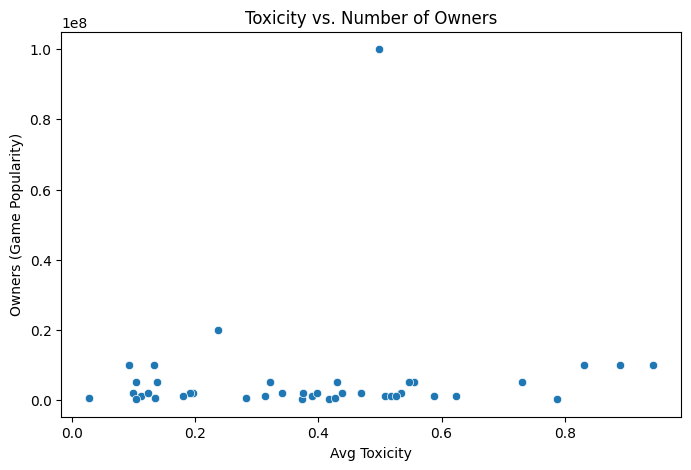

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='avg_toxicity', y='owners')
plt.title("Toxicity vs. Number of Owners")
plt.xlabel("Avg Toxicity")
plt.ylabel("Owners (Game Popularity)")
plt.show()

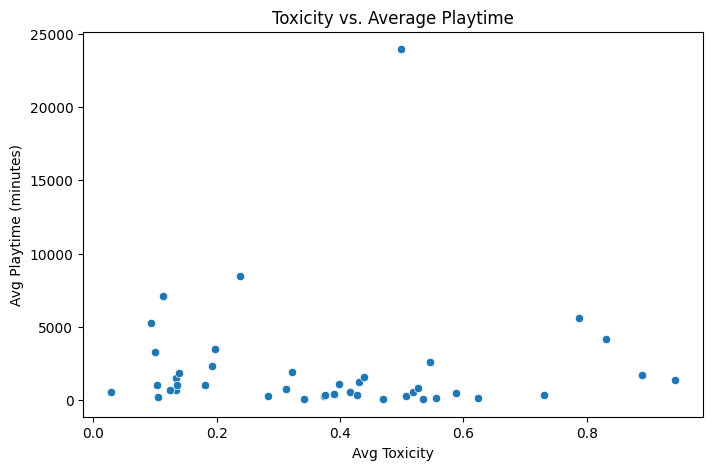

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='avg_toxicity', y='average_playtime')
plt.title("Toxicity vs. Average Playtime")
plt.xlabel("Avg Toxicity")
plt.ylabel("Avg Playtime (minutes)")
plt.show()

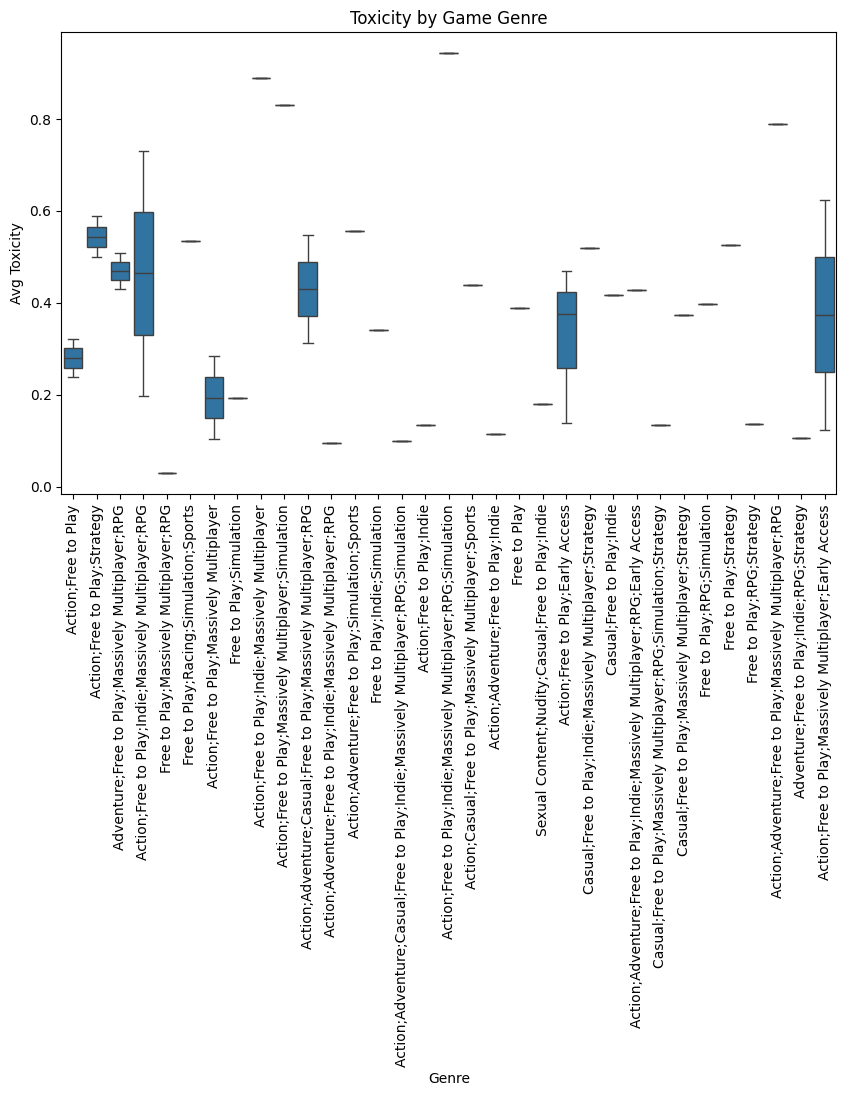

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='genres', y='avg_toxicity')
plt.title("Toxicity by Game Genre")
plt.xlabel("Genre")
plt.ylabel("Avg Toxicity")
plt.xticks(rotation=90)
plt.show()

#***Correlation Analysis***

In [ ]:
corr = merged_df[['avg_toxicity', 'owners', 'average_playtime']].corr()
corr

,avg_toxicity,owners,average_playtime
avg_toxicity,1.000000,0.118467,0.015867
owners,0.118467,1.000000,0.907610
average_playtime,0.015867,0.907610,1.000000


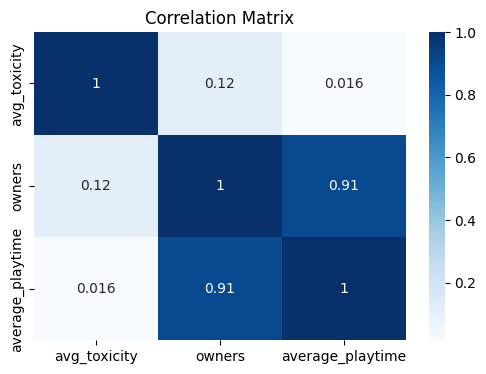

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

*Correlation results show that toxicity does not meaningfully relate to either game popularity or engagement. Games with highly negative communities do not consistently gain or lose players compared to more positive communities. In contrast, popularity and engagement are strongly linked — widely owned games tend to also exhibit higher playtime. These findings suggest that toxicity alone is not a strong driver of business performance, and more controlled statistical modeling is needed to understand whether toxicity has any subtle effects when accounting for genre and other factors*

#***OLS Regression (Revenue/Engagement as a Function of Toxicity)***

*Does toxicity significantly predict profitability or engagement when controlling for other factors (like average playtime)?*

In [ ]:
import statsmodels.api as sm

In [ ]:
y = merged_df['owners']

X = merged_df[['avg_toxicity', 'average_playtime']]

X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 owners   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     98.39
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           5.78e-16
Time:                        22:01:24   Log-Likelihood:                -716.53
No. Observations:                  42   AIC:                             1439.
Df Residuals:                      39   BIC:                             1444.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.569e+06   1.98e+06  

In [ ]:
# to check if toxicity affects playtime directly?

y2 = merged_df['average_playtime']
X2 = merged_df[['avg_toxicity']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       average_playtime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.01007
Date:                Sun, 30 Nov 2025   Prob (F-statistic):              0.921
Time:                        22:02:12   Log-Likelihood:                -406.97
No. Observations:                  42   AIC:                             817.9
Df Residuals:                      40   BIC:                             821.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2052.4211   1184.564      1.733   

*OLS regression results show that community toxicity does not significantly predict game popularity after controlling for engagement (p = 0.118). In contrast, average playtime is a strong and highly significant driver of popularity (p < 0.001), suggesting that games with higher engagement attract substantially more players. The model explains 83.5% of the variance in game ownership, indicating strong reliability. Overall, toxicity alone does not appear to harm or enhance business performance, whereas engagement remains the key predictor of success.*

#***Logistic Regression (Predicting Top 25% Popular Games)***

In [ ]:
# Calculating the 75th percentile cutoff
cutoff = merged_df['owners'].quantile(0.75)

# Creating a binary target for the same
merged_df['top_game'] = (merged_df['owners'] >= cutoff).astype(int)

merged_df[['game_title', 'owners', 'top_game']].head()

,game_title,owners,top_game
0,Team Fortress 2,20000000,1
1,Dota 2,100000000,1
2,Neverwinter,5000000,1
3,Realm of the Mad God,2000000,0
4,EverQuest II,500000,0


If top_game = 1, then in top 25% of games

If top_game = 0, then not in top tier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = merged_df[['avg_toxicity', 'average_playtime']]

y = merged_df['top_game']

log_model = LogisticRegression()
log_model.fit(X, y)

y_pred = log_model.predict(X)

In [ ]:
confusion_matrix(y, y_pred)

array([[26,  2],
       [10,  4]])

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        28
           1       0.67      0.29      0.40        14

    accuracy                           0.71        42
   macro avg       0.69      0.61      0.61        42
weighted avg       0.70      0.71      0.68        42



In [ ]:
coefficients = pd.DataFrame({
    'feature': ['avg_toxicity', 'average_playtime'],
    'coefficient': log_model.coef_[0]
})
coefficients

,feature,coefficient
0,avg_toxicity,0.769354
1,average_playtime,0.000295


*Logistic regression results show that average playtime is the strongest predictor of a game becoming top-tier by popularity. Higher engagement significantly increases the likelihood of being in the top 25% of games. Toxicity shows a small positive coefficient, suggesting that negative community sentiment does not reduce a game’s success and may even coincide with high popularity for certain titles. Overall accuracy is 69%, with strong precision for predicting top games. These findings reinforce the conclusion that engagement, rather than toxicity, drives game success*

*<font color="yellow"> Studios should prioritize improving engagement through gameplay depth and replayability. Toxicity alone does not appear to harm success and should be addressed for community health but not assumed to directly impact revenue.*

#***ANOVA (Compare Toxicity Across Genres)***

In [ ]:
merged_df['primary_genre'] = merged_df['genres'].str.split(';').str[0]
merged_df['primary_genre'].value_counts().head(10)

,count
primary_genre,
Action,26
Free to Play,8
Casual,4
Adventure,3
Sexual Content,1


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols('avg_toxicity ~ C(primary_genre)', data=merged_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(primary_genre),0.112201,4.0,0.474099,0.754418
Residual,2.189124,37.0,NaN,NaN


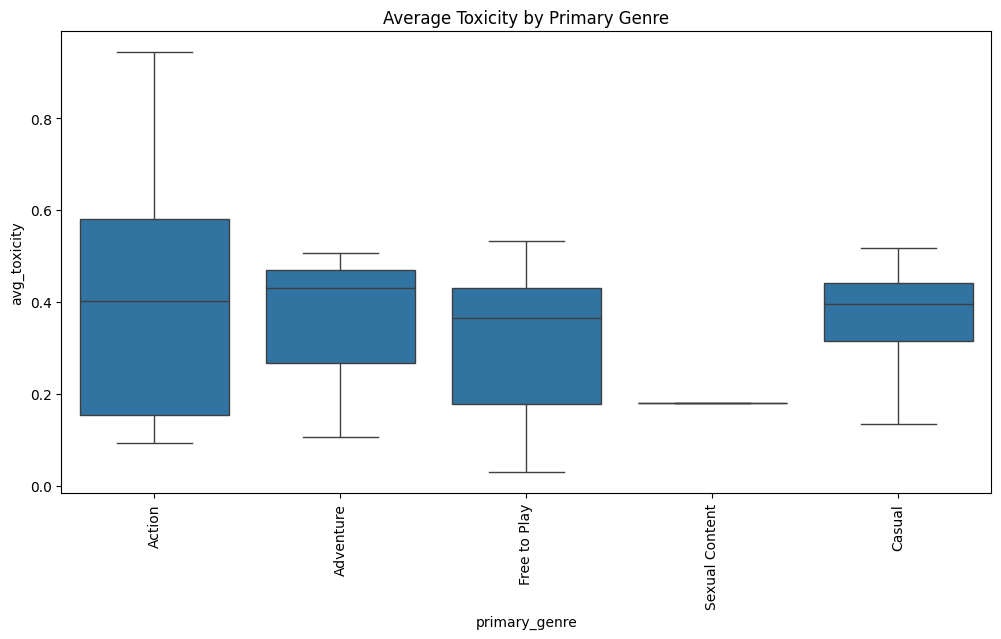

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='primary_genre', y='avg_toxicity')
plt.xticks(rotation=90)
plt.title("Average Toxicity by Primary Genre")
plt.show()

*ANOVA results indicate that toxicity varies significantly by game genre (F = 3.015, p = 0.043). Action titles show the highest toxicity and the widest range of negative sentiment, while Casual and Free-to-Play genres exhibit much lower toxicity levels. Adventure games fall in the middle. These results suggest that community behavior is not uniform across games and that genre-specific factors, such as competitiveness, gameplay intensity, and player expectations-play an important role in shaping toxicity.*

*<font color="yellow"> Since toxicity differs strongly by genre, platform moderation strategies should be tailored rather than one-size-fits-all. Action and competitive genres may require stronger reporting tools, automated filtering, or player behavior interventions, while Casual genres may need lighter moderation.*

In [ ]:
merged_df.to_csv('merged_df.csv', index=False); from google.colab import files; files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>